# ЛЕГЕНДА

Вы продолжаете работу над мобильной игрой Quiz Freeze.

Проверить несколько гипотез:


Гипотеза 1.
По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?

Гипотеза 2. Кажется, повторное прохождение обучения положительно влияет на оплату, верно?

Гипотеза 3. Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение?

# ЦЕЛЬ

Исследовать поведение пользователей в обновлённом приложении.

# ЗАДАЧИ

В рамках проверки гипотез вам необходимо решить три задачи:

1. Определить, насколько обучение сокращает время прохождения этапов игры.
2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.
3. Определить, насколько прозрачен процесс взаимодействия с игрой.

## КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)

1. Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.
2. Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 
3. Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

# Начало кода

Важно! Выполнять задание необходимо на основе данных пользователей, которые зарегистрировались в 2018 году (с 1 января по 31 декабря 2018 года включительно).

In [479]:
# Импорт библиотек

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

## Загрузка датасетов и обзор данных

In [480]:
# Загрузка всех файлов проекта и создание их копий для дальнейших преобразований
event = pd.read_csv('7_4_Events.csv')
events_df = event.copy()

purchase = pd.read_csv('purchase.csv')
purchase_df = purchase.copy()

Проверка файла events_df

In [481]:
# Данные таблицы events_df
display(events_df)
display(events_df.info())

,id,event_type,selected_level,start_time,tutorial_id,user_id
0,28903,registration,NaN,2016-05-11T23:40:55,NaN,12583
1,28904,registration,NaN,2016-05-11T23:49:58,NaN,12584
2,28905,registration,NaN,2016-05-12T00:53:07,NaN,12585
3,28906,tutorial_start,NaN,2016-05-12T01:32:20,17562.0,12585
4,28907,tutorial_finish,NaN,2016-05-12T01:34:53,17562.0,12585
...,...,...,...,...,...,...
252329,281232,level_choice,hard,2020-07-02T10:02:15,NaN,87439
252330,281233,level_choice,medium,2020-07-02T11:38:52,NaN,87488
252331,281234,pack_choice,NaN,2020-07-02T11:42:14,NaN,87488
252332,281235,tutorial_start,NaN,2020-07-02T13:32:58,86127.0,87464


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252334 entries, 0 to 252333
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              252334 non-null  int64  
 1   event_type      252334 non-null  object 
 2   selected_level  31086 non-null   object 
 3   start_time      252334 non-null  object 
 4   tutorial_id     125103 non-null  float64
 5   user_id         252334 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.6+ MB


None

In [482]:
# Перевод столбца start_time в формат дат
events_df['start_time'] = pd.to_datetime(events_df['start_time'], errors='coerce')

# Проверка перобразования
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252334 entries, 0 to 252333
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              252334 non-null  int64         
 1   event_type      252334 non-null  object        
 2   selected_level  31086 non-null   object        
 3   start_time      252201 non-null  datetime64[ns]
 4   tutorial_id     125103 non-null  float64       
 5   user_id         252334 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 11.6+ MB


Важно! Выполнять задание необходимо на основе данных пользователей, которые зарегистрировались в 2018 году (с 1 января по 31 декабря 2018 года включительно).

In [483]:
# Маска по пользователям зарегестрированным в 2018 г.
mask2018 = (events_df['start_time'] < '2019-01-01') & (events_df['start_time'] >= '2018-01-01') & (events_df['event_type'] == 'registration')

# Фильтрация таблийы с данными пользователей зарегестрированными в 2018 г.
user_list = list(events_df[mask2018]['user_id'])
events_df = events_df[events_df['user_id'].isin(user_list)]

In [484]:
# Даные о таблице events_df после фильтрации
events_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66959 entries, 51405 to 118364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              66959 non-null  int64         
 1   event_type      66959 non-null  object        
 2   selected_level  8342 non-null   object        
 3   start_time      66959 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         66959 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [485]:
# Исследуем значения events_df
events_df.describe(include='all')

C:\Users\sgari\AppData\Local\Temp\ipykernel_13992\4145490442.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,id,event_type,selected_level,start_time,tutorial_id,user_id
count,66959.000000,66959,8342,66959,32954.000000,66959.000000
unique,NaN,5,3,66809,NaN,NaN
top,NaN,registration,medium,2018-03-13 09:37:43,NaN,NaN
freq,NaN,19926,4645,9,NaN,NaN
first,NaN,NaN,NaN,2018-01-01 03:48:40,NaN,NaN
last,NaN,NaN,NaN,2019-01-01 05:50:36,NaN,NaN
mean,113787.000045,NaN,NaN,NaN,40532.934393,37781.543362
std,19329.542752,NaN,NaN,NaN,5213.486632,5751.497904
min,80308.000000,NaN,NaN,NaN,31505.000000,27832.000000
25%,97047.500000,NaN,NaN,NaN,36008.250000,32849.000000


Проверка файла purchase_df

In [486]:
# Данные таблицы purchase_df
display(purchase_df)
display(purchase_df.info())

,id,user_id,event_datetime,amount
0,15674,12584,2016-05-12T10:34:16,100
1,15675,12985,2016-05-13T08:25:56,50
2,15676,12828,2016-05-13T16:33:46,50
3,15677,12598,2016-05-14T01:09:37,150
4,15678,13037,2016-05-14T01:24:46,100
...,...,...,...,...
5951,21625,87331,2020-07-06T09:02:07,50
5952,21626,87418,2020-07-06T14:16:37,100
5953,21627,87431,2020-07-06T22:48:59,50
5954,21628,87363,2020-07-07T05:38:56,100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5956 non-null   int64 
 1   user_id         5956 non-null   int64 
 2   event_datetime  5956 non-null   object
 3   amount          5956 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 186.2+ KB


None

In [487]:
# Столбик event_datetime в формат дат
purchase_df['event_datetime'] = pd.to_datetime(purchase_df['event_datetime'])

In [488]:
# Проверка преобразования
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              5956 non-null   int64         
 1   user_id         5956 non-null   int64         
 2   event_datetime  5956 non-null   datetime64[ns]
 3   amount          5956 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 186.2 KB


In [489]:
# Фильтрация по purchase_df по списку пользователей зарегестрированх в 2018 г.
purchase_df = purchase_df[purchase_df['user_id'].isin(user_list)]

In [490]:
# Проверка преобразования
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1171 to 2778
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1600 non-null   int64         
 1   user_id         1600 non-null   int64         
 2   event_datetime  1600 non-null   datetime64[ns]
 3   amount          1600 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 62.5 KB


### ОБЪЕДИНЕНИЕ ДАТАФРЕМОВ

In [491]:
# Добавим столбик event_type с событием purchase
purchase_df['event_type'] = 'purchase'

In [492]:
# Перед объединеним переименуем столбцы
events_df = events_df.rename(columns={"id": "event_id", 'start_time': 'event_datetime'})
purchase_df = purchase_df.rename(columns={"id": "event_id"})

In [493]:
total_events_df = pd.concat([events_df, purchase_df],sort=False)

In [494]:
# Информация об объединенном датафрейме
display(total_events_df)
display(total_events_df.info())

,event_id,event_type,selected_level,event_datetime,tutorial_id,user_id,amount
51405,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN
51406,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN
51407,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN
51408,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN
51409,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN
...,...,...,...,...,...,...,...
2767,18441,purchase,NaN,2019-01-02 03:48:19,NaN,47498,100.0
2768,18442,purchase,NaN,2019-01-02 23:26:26,NaN,47647,150.0
2769,18443,purchase,NaN,2019-01-03 00:36:36,NaN,47554,50.0
2774,18448,purchase,NaN,2019-01-04 12:51:41,NaN,47742,50.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68559 entries, 51405 to 2778
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        68559 non-null  int64         
 1   event_type      68559 non-null  object        
 2   selected_level  8342 non-null   object        
 3   event_datetime  68559 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         68559 non-null  int64         
 6   amount          1600 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 4.2+ MB


None

In [495]:
# Сброс индексов (что бы не было дубликатов)
total_events_df = total_events_df.reset_index(drop=True).sort_values('event_datetime')

In [496]:
# Вывод информации после сброса индектсов 
display(total_events_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68559 entries, 0 to 68558
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        68559 non-null  int64         
 1   event_type      68559 non-null  object        
 2   selected_level  8342 non-null   object        
 3   event_datetime  68559 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         68559 non-null  int64         
 6   amount          1600 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 4.2+ MB


None

In [497]:
# Вывод всех видов событий
display(total_events_df['event_type'].unique())

array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'pack_choice', 'purchase'], dtype=object)

## Гипотиза 1. Решение

1. Определить, насколько обучение сокращает время прохождения этапов игры.

- Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.

In [498]:
total_events_df

,event_id,event_type,selected_level,event_datetime,tutorial_id,user_id,amount
0,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN
1,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN
2,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN
3,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN
4,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN
...,...,...,...,...,...,...,...
68554,18441,purchase,NaN,2019-01-02 03:48:19,NaN,47498,100.0
68555,18442,purchase,NaN,2019-01-02 23:26:26,NaN,47647,150.0
68556,18443,purchase,NaN,2019-01-03 00:36:36,NaN,47554,50.0
68557,18448,purchase,NaN,2019-01-04 12:51:41,NaN,47742,50.0


Создадим множества с разными группами юзеров:

In [499]:
# Список id пользователей начавших обучение
user_start = set(total_events_df[total_events_df['event_type'] == 'tutorial_start']['user_id'].unique())

# Сколько пользователей начали обучение
len(user_start)


11858

In [500]:
# Список id пользователей закончивших обучение
user_finish = set(total_events_df[total_events_df['event_type'] == 'tutorial_finish']['user_id'].unique())

# Сколько пользователей закончило обучение?
len(user_finish)

10250

In [501]:
# Список id всех ползьвателей
all_users = set(total_events_df[total_events_df['event_type'] == 'registration']['user_id'].unique())

# Всего пользователей
len(all_users)

19926

In [502]:
# Те пользователи, кто не обучался
users_without_tutorial = set(all_users.difference(user_start))

# Число тех, кто не обучался
len(users_without_tutorial)

8068

Функция для создания признака по обучению.

In [503]:
def studies_sort(x):
    if x in user_finish:
        return 'finished'
    if x in users_without_tutorial:
        return 'not_studies'
    else:
        return 'other'

Добавим новый признак обучения tutorial_status:
- finished - те, кто закончил обучение.
- not_studies  - те, кто не обучался.
- other - все остальные пользователи.

In [504]:
# Создадим дополнительный признак с началом или ококнчанием обучения
total_events_df['studies'] = total_events_df['user_id'].apply(studies_sort)
total_events_df

,event_id,event_type,selected_level,event_datetime,tutorial_id,user_id,amount,studies
0,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,not_studies
1,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,finished
2,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,finished
3,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,finished
4,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,finished
...,...,...,...,...,...,...,...,...
68554,18441,purchase,NaN,2019-01-02 03:48:19,NaN,47498,100.0,finished
68555,18442,purchase,NaN,2019-01-02 23:26:26,NaN,47647,150.0,finished
68556,18443,purchase,NaN,2019-01-03 00:36:36,NaN,47554,50.0,finished
68557,18448,purchase,NaN,2019-01-04 12:51:41,NaN,47742,50.0,finished


Создадим сводную таблицу pivot_1 для проверки 1й гипотезы
Агрегирующую функцию по значениям event_datetime поставим min - что бы выводить только первую запись события раждого типа события пользователя, в случае если он начанил одно и то же событие несколько раз.

In [505]:
total_events_df = total_events_df.fillna(0) 

pivot_1 = total_events_df.pivot_table(
    values='event_datetime',
    index=['user_id', 'studies'],
    columns='event_type',
    aggfunc='min'
)
# Сбросим индексы для их пеервода в столбики
pivot_1  = pivot_1.reset_index()
pivot_1

event_type,user_id,studies,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
0,27832,not_studies,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT
1,27833,finished,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
2,27834,finished,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
3,27835,finished,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
4,27836,finished,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40
...,...,...,...,...,...,...,...,...
19921,47753,finished,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56
19922,47754,not_studies,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT
19923,47755,finished,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14
19924,47756,finished,2019-01-01 05:42:11,2019-01-01 05:50:36,NaT,2018-12-31 23:17:30,2019-01-01 03:29:25,2019-01-01 03:26:18


In [506]:
pivot_1.studies.value_counts()

finished       10250
not_studies     8068
other           1608
Name: studies, dtype: int64

Уберем из датфрема все записи по пользователям, кто не начинал обучение.

In [507]:
pivot_1 = pivot_1[pivot_1['studies'] != 'other']
pivot_1

event_type,user_id,studies,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
0,27832,not_studies,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT
1,27833,finished,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
2,27834,finished,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
3,27835,finished,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
4,27836,finished,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40
...,...,...,...,...,...,...,...,...
19921,47753,finished,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56
19922,47754,not_studies,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT
19923,47755,finished,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14
19924,47756,finished,2019-01-01 05:42:11,2019-01-01 05:50:36,NaT,2018-12-31 23:17:30,2019-01-01 03:29:25,2019-01-01 03:26:18


ЭТАПЫ ИГРЫ:

- Регистрация 
- Старт обучения (опционально) 
- Завершение обучения (если был Старт) 
- Выбор уровня сложности 
- Выбор пакетов вопросов 
- Покупка платных вопросов (опционально)

Создаим три столбика со временм прохождения этапов: 
- time_level_choice - время от регистрации до выбора уровня сложности.
- time_pack_choice - время от выбора уровня сложности до выбора пакета.
- time_purchase - время от выбора пакета до покупки.
- all_time -общее время прохождения от момента регистрации до оплаты. 

In [508]:
pivot_1['time_level_choice'] = pivot_1['level_choice']- pivot_1['registration']
pivot_1['time_pack_choice'] = pivot_1['pack_choice'] - pivot_1['level_choice']
pivot_1['time_purchase'] = pivot_1['purchase'] - pivot_1['pack_choice']
pivot_1['all_time'] = pivot_1['purchase'] - pivot_1['registration']

pivot_1.head()

C:\Users\sgari\AppData\Local\Temp\ipykernel_13992\3118450595.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sgari\AppData\Local\Temp\ipykernel_13992\3118450595.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sgari\AppData\Local\Temp\ipykernel_13992\3118450595.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

event_type,user_id,studies,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,time_level_choice,time_pack_choice,time_purchase,all_time
0,27832,not_studies,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,NaT,NaT,NaT,NaT
1,27833,finished,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,NaT,NaT,NaT,NaT
2,27834,finished,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,NaT,NaT,NaT,NaT
3,27835,finished,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,0 days 08:42:35,0 days 00:01:21,NaT,NaT
4,27836,finished,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,NaT,NaT,NaT,NaT


In [509]:
pivot_1_visualization = pivot_1.groupby(by='studies')['time_level_choice', 'time_pack_choice', 'time_purchase', 'all_time' ].mean()
pivot_1_visualization = pivot_1_visualization.reset_index()
pivot_1_visualization

C:\Users\sgari\AppData\Local\Temp\ipykernel_13992\3873489253.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



event_type,studies,time_level_choice,time_pack_choice,time_purchase,all_time
0,finished,0 days 07:05:36.854819357,0 days 00:05:18.146058732,3 days 17:17:59.641326883,4 days 00:30:03.247408431
1,not_studies,0 days 05:15:33.122448979,0 days 00:05:23.824324324,4 days 04:49:33.590909090,4 days 09:06:01.909090909


Пеерведем столбики с интервалами времени в часы для построени графиков.

In [510]:
pivot_1_visualization['time_level_choice'] = round(pivot_1_visualization.time_level_choice /pd.Timedelta('1 hour'),2)

pivot_1_visualization['time_pack_choice'] = round(pivot_1_visualization.time_pack_choice /pd.Timedelta('1 min'),2)

pivot_1_visualization['time_purchase'] = round(pivot_1_visualization.time_purchase /pd.Timedelta('1 hour'),2)

pivot_1_visualization['all_time'] = round(pivot_1_visualization.all_time /pd.Timedelta('1 hour'),2)

In [511]:
pivot_1_visualization

event_type,studies,time_level_choice,time_pack_choice,time_purchase,all_time
0,finished,7.09,5.3,89.30,96.5
1,not_studies,5.26,5.4,100.83,105.1


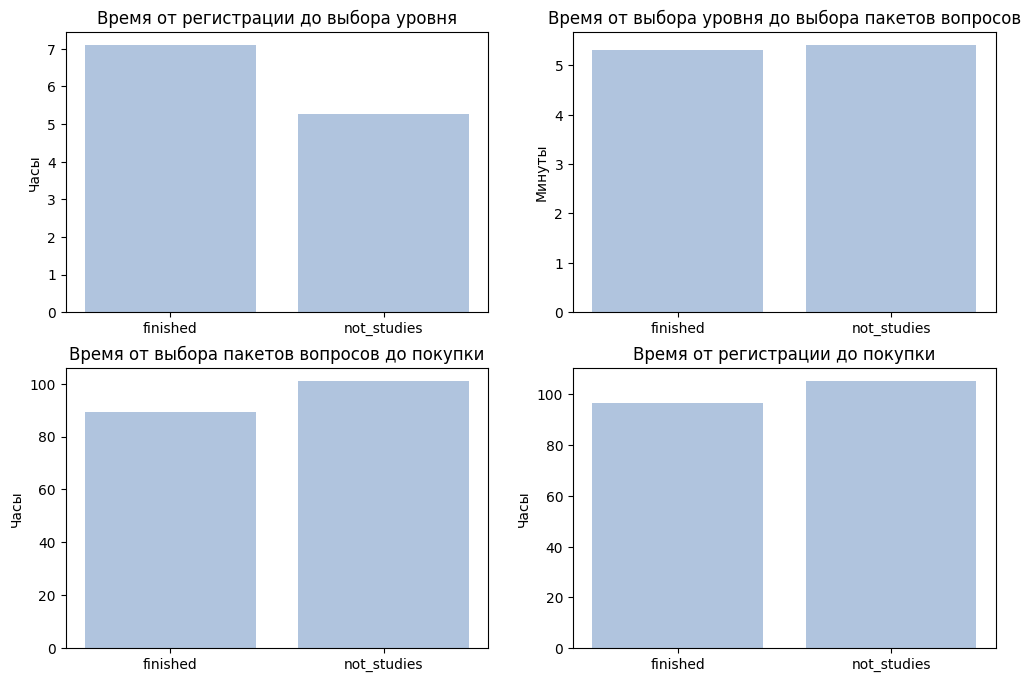

In [512]:
#Визуализация данных
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#Время от регистрации до выбора уровня
axes[0][0].bar(x=pivot_1_visualization['studies'], 
    height=pivot_1_visualization['time_level_choice'],
    color='lightsteelblue',
    
)
axes[0][0].set_title('Время от регистрации до выбора уровня')
axes[0][0].set_ylabel('Часы')
axes[0][0].xaxis.set_tick_params(rotation=0)

#Время от выбора уровня до выбора пакетов вопросов
axes[0][1].bar(x=pivot_1_visualization['studies'],
     height=pivot_1_visualization['time_pack_choice'],
     color='lightsteelblue'
)
axes[0][1].set_title('Время от выбора уровня до выбора пакетов вопросов')
axes[0][1].set_ylabel('Минуты')
axes[0][1].xaxis.set_tick_params(rotation=0)

#Время от выбора пакетов вопросов до покупки
axes[1][0].bar(x=pivot_1_visualization['studies'],
     height=pivot_1_visualization['time_purchase'],
     color='lightsteelblue',
    
)
axes[1][0].set_title('Время от выбора пакетов вопросов до покупки')
axes[1][0].set_ylabel('Часы')
axes[1][0].xaxis.set_tick_params(rotation=0)

#Время от регистрации до покупки
axes[1][1].bar(x=pivot_1_visualization['studies'],
     height=pivot_1_visualization['all_time'],
     color='lightsteelblue',
    
)
axes[1][1].set_title('Время от регистрации до покупки')
axes[1][1].set_ylabel('Часы')
axes[1][1].xaxis.set_tick_params(rotation=0)

### ВЫВОД ПО ГИПОТЕЗЕ 1

- Время занимаемое от регистрации до выбора уровня сложности занимает больше времени у тех, кто проходит обучение, это связано с тем, что те, те те кто обучается тратят времи на учебны процесс. В сренем у тех кто прошел обучение этот этап занимает на 2 ч больше времени - 5 ч у тех, кто не проходил обучение и 7 ч у тех, кто прошел обучение.
- Время от выбора уровня сложности до выбора пакета практически одинаковой у обоих групп расматриваемых пользовователей и оставляет чуть более 5 минут. Что является незначительным на всей измеряемой продолжительности от регистрации до оплаты. 
 - Время от выбора пакета до покупки меньше на 11 ч у тех, кто прошел обучение и составляет 96 с половиной часов, против почти 101 часа у тех, кто не начинал обучение. Определено это самый длительный этап и имеет наибольший вес во всей рассматриваемой временой линии.
  - Т.о. все время от регистрации до момонета покупки у зарегестрированных пользователей занимает  в среднем 96,5 ч, а у тех, кто не проходил обучение - 105,1 ч. Затраченное время на обучение ускоряет прохождение следующих этапов.

## Гипотиза 2. Решение.

2. Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 

In [513]:
total_events_df.head()

,event_id,event_type,selected_level,event_datetime,tutorial_id,user_id,amount,studies
0,80308,registration,0,2018-01-01 03:48:40,0.0,27832,0.0,not_studies
1,80309,registration,0,2018-01-01 04:07:25,0.0,27833,0.0,finished
2,80310,registration,0,2018-01-01 08:35:10,0.0,27834,0.0,finished
3,80311,registration,0,2018-01-01 11:54:47,0.0,27835,0.0,finished
4,80312,registration,0,2018-01-01 13:28:07,0.0,27836,0.0,finished


In [514]:
# Посчитаем сколько раз начанают обучение каждый отлельный пользователь.

education_count = total_events_df[total_events_df['event_type']=='tutorial_start']['user_id'].value_counts()
education_count  = education_count.reset_index()
education_count 

,index,user_id
0,37672,9
1,39648,9
2,28768,9
3,47108,9
4,46280,9
...,...,...
11853,30492,1
11854,37223,1
11855,37225,1
11856,37226,1


In [515]:
education_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   index    11858 non-null  int64
 1   user_id  11858 non-null  int64
dtypes: int64(2)
memory usage: 185.4 KB


In [516]:
# Множество пользователей совершивших оппату

user_buy  = set(purchase_df['user_id'])

# Множество пользователей начавших обучение и совершивших олпату

user_tutorial_buy = user_start.intersection(user_buy)

len(user_tutorial_buy)

1578

In [517]:
def buy(x):
    if x in user_tutorial_buy:
        return 1
    else:
        return 0

In [518]:
education_count['buy'] = education_count['index'].apply(buy)
education_count

,index,user_id,buy
0,37672,9,0
1,39648,9,0
2,28768,9,0
3,47108,9,0
4,46280,9,0
...,...,...,...
11853,30492,1,0
11854,37223,1,0
11855,37225,1,0
11856,37226,1,0


In [519]:
#Сгруппируем таблицу по количеству начатых обучений и посчитаем количество пользователей по каждой группировке и количество пользователей совершивших оплату
education_count = education_count.groupby(by = 'user_id').agg({'index':['count'], 'buy':['sum']})
education_count  = education_count.reset_index()
# Переименуем столбики
education_count = education_count.rename(columns={"user_id": "qty_start_tutorial", 'index': 'user_qty'})


education_count

,qty_start_tutorial,user_qty,buy
,,count,sum
0,1,9103,1207
1,2,1589,218
2,3,427,51
3,4,221,30
4,5,109,16
5,6,116,14
6,7,94,12
7,8,86,13
8,9,113,17


In [520]:
# Посчитаем конверсию в оплату для каждой группы полльзователей
education_count['convertion'] = round(education_count['buy']['sum'] / education_count['user_qty']['count'] * 100, 1)

education_count

,qty_start_tutorial,user_qty,buy,convertion
,,count,sum,
0,1,9103,1207,13.3
1,2,1589,218,13.7
2,3,427,51,11.9
3,4,221,30,13.6
4,5,109,16,14.7
5,6,116,14,12.1
6,7,94,12,12.8
7,8,86,13,15.1
8,9,113,17,15.0


In [521]:
education_count.columns = education_count.columns.droplevel(1)

education_count

,qty_start_tutorial,user_qty,buy,convertion
0,1,9103,1207,13.3
1,2,1589,218,13.7
2,3,427,51,11.9
3,4,221,30,13.6
4,5,109,16,14.7
5,6,116,14,12.1
6,7,94,12,12.8
7,8,86,13,15.1
8,9,113,17,15.0


In [522]:
education_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qty_start_tutorial  9 non-null      int64  
 1   user_qty            9 non-null      int64  
 2   buy                 9 non-null      int64  
 3   convertion          9 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 416.0 bytes


In [523]:
# Построим шрафик для визуализации ответа по гипотизе 2
fig = px.bar(
    data_frame=education_count,
    x='qty_start_tutorial', 
    y=['user_qty', 'buy'], 
    height=500, 
    width=1100, 
    title='Сравнение колиества пользователей начавших обучение от 1 до 9 раз и пользователей сделавших оплату'
)
fig.update_layout(barmode='group')
fig.show()

In [524]:
# Выведем график с процентами конверсии для каждой из 9 групп
fig = px.bar(
    data_frame=education_count,
    x='qty_start_tutorial', 
    y='convertion', 
    height=500, 
    width=1000, 
    title='Конверсия девяти групп пользователей в оплату, %'
)
fig.update_layout(barmode='group')
fig.show()

### ВЫВОД ПО ГИПОТЕЗЕ 2

- Пользователи начинают обучение от 1 до 9 раз. Причем конверсию пользователь в покупку не меняется в зависимости от того, сколько раз начал обучение и вероятность покупки сотавляет от 10 до 12%.

Определить, насколько прозрачен процесс взаимодействия с игрой: 
- выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

In [525]:
# Из объединенного датафрейма создадим два отлеьных: 1. С записями начала обучения. 2. С записями выбора уровня сложности
# Для начала выведем объединенный датафрейм.
total_events_df.head()

,event_id,event_type,selected_level,event_datetime,tutorial_id,user_id,amount,studies
0,80308,registration,0,2018-01-01 03:48:40,0.0,27832,0.0,not_studies
1,80309,registration,0,2018-01-01 04:07:25,0.0,27833,0.0,finished
2,80310,registration,0,2018-01-01 08:35:10,0.0,27834,0.0,finished
3,80311,registration,0,2018-01-01 11:54:47,0.0,27835,0.0,finished
4,80312,registration,0,2018-01-01 13:28:07,0.0,27836,0.0,finished


In [526]:
# Создадим датафремй с записями начала обeчения
study_df = total_events_df[total_events_df['event_type'] == 'tutorial_start']

# Переименуем признаки
study_df = study_df.rename(columns={'event_datetime': 'study_datetime', 'event_type': 'tutorial_start'})

# Уберем ненужные признаки
study_df = study_df.drop(['event_id', 'tutorial_id', 'amount', 'studies'], axis=1)

# Посмотрим сколько уникальных пользователейй осталось в таблице
display(study_df.user_id.nunique())

# Посмотрим на датафрем
study_df.head()

11858

,tutorial_start,selected_level,study_datetime,user_id
7,tutorial_start,0,2018-01-01 14:54:40,27836
8,tutorial_start,0,2018-01-01 15:00:51,27835
10,tutorial_start,0,2018-01-01 15:40:43,27836
12,tutorial_start,0,2018-01-01 17:47:40,27833
15,tutorial_start,0,2018-01-01 19:11:36,27839


In [527]:
# Создадим датафремй с записями выбора уровня сложности
level_choice_df = total_events_df[total_events_df['event_type'] == 'level_choice']

# Переименуем признаки
level_choice_df = level_choice_df.rename(columns={'event_datetime': 'level_datetime', 'event_type': 'level_choice'})

# Уберем ненужные признаки
level_choice_df = level_choice_df.drop(['event_id', 'tutorial_id', 'amount', 'studies'], axis=1)

# Посмотрим сколько уникальных пользователейй осталось в таблице
lvl_chc_and_strt_ttrl  = level_choice_df.user_id.nunique()
display(lvl_chc_and_strt_ttrl)

# Посмотрим на датафрем
level_choice_df.head()

8342

,level_choice,selected_level,level_datetime,user_id
19,level_choice,medium,2018-01-01 20:37:22,27835
23,level_choice,hard,2018-01-01 22:37:50,27839
36,level_choice,medium,2018-01-02 05:18:42,27840
38,level_choice,hard,2018-01-02 06:19:18,27845
45,level_choice,easy,2018-01-02 08:46:03,27842


In [528]:
# Объединим датафремы

merged = study_df.merge(
    level_choice_df,
    on='user_id',
    how='inner'
)
#Выведем число уникальных пользователей в объединенном датафрейме - те польщзователи которые начинали обучение и делали выбор уровня сложности.
display(merged.user_id.nunique())

#Посмотрим на датафремй
display(merged.head())

8244

,tutorial_start,selected_level_x,study_datetime,user_id,level_choice,selected_level_y,level_datetime
0,tutorial_start,0,2018-01-01 15:00:51,27835,level_choice,medium,2018-01-01 20:37:22
1,tutorial_start,0,2018-01-01 19:11:36,27839,level_choice,hard,2018-01-01 22:37:50
2,tutorial_start,0,2018-01-02 02:07:07,27840,level_choice,medium,2018-01-02 05:18:42
3,tutorial_start,0,2018-01-02 03:03:44,27845,level_choice,hard,2018-01-02 06:19:18
4,tutorial_start,0,2018-01-02 07:08:00,27845,level_choice,hard,2018-01-02 06:19:18


In [529]:
# Создадим  признак timedelta который равен разницу между временм выбора уровня и временем начала учебы

merged['timedelta'] = merged['level_datetime'] - merged['study_datetime']

# Перевод разницы времени в секунды
merged['timedelta']  = merged['timedelta'] / pd.Timedelta('1 second')

merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12686 entries, 0 to 12685
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tutorial_start    12686 non-null  object        
 1   selected_level_x  12686 non-null  object        
 2   study_datetime    12686 non-null  datetime64[ns]
 3   user_id           12686 non-null  int64         
 4   level_choice      12686 non-null  object        
 5   selected_level_y  12686 non-null  object        
 6   level_datetime    12686 non-null  datetime64[ns]
 7   timedelta         12686 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 892.0+ KB


In [530]:
# Посчитаем количество уникальных пользователей, которые начали обучение после выбора уровня сложности.
# Это такие пользователи у которых разница времени между выбором уровня сложности и начала обучения меньше нуля. 

user_returned_to_tutorial = merged[merged['timedelta']<0]['user_id'].nunique()

user_returned_to_tutorial

1386

In [531]:
#Для ответа на гипотезу 3 построим круговой график, но дл начала создадим объект Series на основе корого будет строиться график
series_for_pie = pd.Series({
    'Пользователи начавшие обучение перед выбором сложности': lvl_chc_and_strt_ttrl-user_returned_to_tutorial,
    'Пользователи начавшие обучение после выбора уровня сложности': user_returned_to_tutorial},
    name = 'Прозрачность')
display(series_for_pie)

Пользователи начавшие обучение перед выбором сложности          6956
Пользователи начавшие обучение после выбора уровня сложности    1386
Name: Прозрачность, dtype: int64

ПОСТРОИМ ГРАФИК который покажет  прозрачность процесса взаимодействия с игрой

''

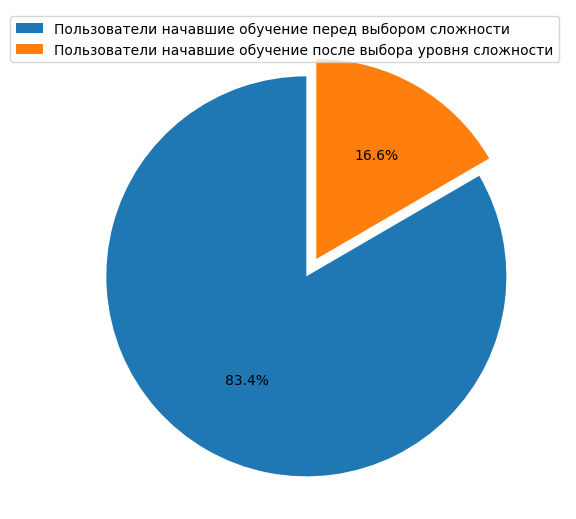

In [532]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([1, 1, 1, 1])
axes.pie(
    series_for_pie,
    autopct='%.1f%%',
    explode = [0.1, 0],
    startangle = 90,

)
plt.legend(series_for_pie.index)
; 



### ВЫВОДЫ ПО ГИПОТИЗЕ №3

- Среди 19926 пользователей зарегестрированых в 2018 году 8342 делали выбор уровня сложности и начинали обучение.
- Из 8342 пользователей 83,4% (6956 пользователя) шли последовательно сначало проходя обучение, а потом выбирали уровень сложности.
- В 16,6% (1386 пользователей) из числа тех, кто делал выбор уровня сложности и начинал обучение возвращался назад к началу обучения. 
Т.о. из всех, кто проходил обучение  в  16,6% случаев прохождение игры было непонятно - это 7% от всего расматриваемого массива полльзователей.

Процент возратов к обучению незначителен, но для его сокращения рекомендую обучение выделить в интрфесе приложения более привлекательно.



# Краткие выводы по всем гипотезам

1.  Пользователи проходящие обучение доходят до этапа оплаты на 9 ч быстрее, несмотря на затраченое время на обучение, чем те, кто не проходид обучение. Рекомендуется привлекать пользователей к обучению дополнительными бонуса или другими средствами. 

2. Обучающие пользователи возвращаются к началу обучения до 9 раз, причем количество стартов обучения не влияет на конверсию покупки, которая составляет для обучающихся от 10% до 12%.

3. Из 8342 пользователей начинающих обучение - 16,6% (1386) начинают обучение после выбора сложности. Это число оставляет 7% вообще от всех расматриваемых пользователей. Процент возрата к обучению после выбора уровня сложности не высокий, но рекомендуется выделить в интерфесе приложения обучение более привлекательно и так же же привлекать пользователей дополнительными бонусами или другими средставми к обучению.